Monte Carlo approximation of p_theta(x=5): 0.01905336856925803


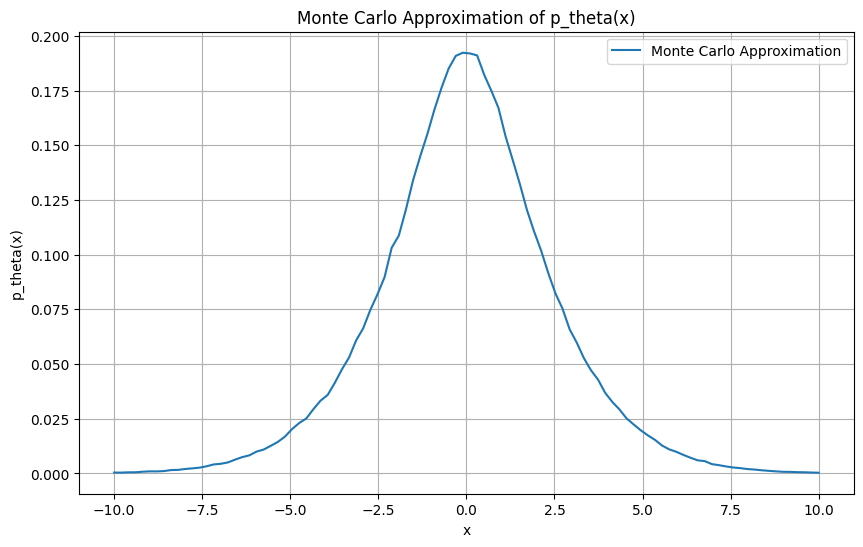

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Define the parameters and functions for p_theta(x | z)
def mu_theta(z):
    return 2 * z  # Example linear function for mean

def sigma_theta(z):
    return 1 + 0.5 * np.abs(z)  # Example function for variance

# Define the conditional distribution p_theta(x | z)
def p_theta_x_given_z(x, z):
    mu = mu_theta(z)
    sigma = sigma_theta(z)
    return (1 / (np.sqrt(2 * np.pi) * sigma)) * np.exp(-0.5 * ((x - mu) / sigma) ** 2)

# Define the prior p(z)
def p_z(z):
    return (1 / np.sqrt(2 * np.pi)) * np.exp(-0.5 * z ** 2)

# Monte Carlo approximation of the integral
def monte_carlo_integral(x, num_samples=10000):
    samples_z = np.random.normal(0, 1, num_samples)  # Sample from p(z)
    p_theta_x_values = [p_theta_x_given_z(x, z) for z in samples_z]  # Evaluate p_theta(x | z) for each sample
    return np.mean(p_theta_x_values)  # Average the evaluations to approximate the integral

# Example usage
x_value = 5
num_samples = 10000
approx_integral = monte_carlo_integral(x_value, num_samples)

# Print the result for a specific x value
print(f"Monte Carlo approximation of p_theta(x={x_value}): {approx_integral}")

# Plot the result for different x values
x_values = np.linspace(-10, 10, 100)
integral_values = [monte_carlo_integral(x, num_samples) for x in x_values]

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(x_values, integral_values, label='Monte Carlo Approximation')
plt.xlabel('x')
plt.ylabel('p_theta(x)')
plt.title('Monte Carlo Approximation of p_theta(x)')
plt.legend()
plt.grid(True)
plt.show()